In [ ]:
## Speech and Natural Language Processing (SNLP)

## Lab02 (28/07/24)
## Word Vectors

In [ ]:
pip install gensim

In [ ]:
## Part 1

In [89]:
import gensim.downloader as api
from gensim.models import Word2Vec

from nltk.tokenize import word_tokenize

In [92]:
wv_pretrained = api.load("word2vec-google-news-300")

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [13]:
words = ['king', 'stars', 'pilot', 'python', 'pasta']

import pandas as pd

for word in words:
    # To find the top 5 most similar words
    print(f" Similar Words to {word} are:")
    df = pd.DataFrame(wv_pretrained.most_similar(word, topn=5), columns=['Word', 'Score'])
    print(df)

 Similar Words to king are:
           Word     Score
0         kings  0.713805
1         queen  0.651096
2       monarch  0.641319
3  crown_prince  0.620422
4        prince  0.615999
 Similar Words to stars are:
              Word     Score
0             star  0.776396
1       superstars  0.711820
2  brightest_stars  0.616709
3        megastars  0.610985
4        superstar  0.609200
 Similar Words to pilot are:
                Word     Score
0              Pilot  0.652223
1           piloting  0.644410
2             pilots  0.639916
3  relaxed_el_Amruni  0.638885
4           Samoshin  0.576824
 Similar Words to python are:
              Word     Score
0          pythons  0.668838
1   Burmese_python  0.668037
2            snake  0.660629
3        crocodile  0.659136
4  boa_constrictor  0.644352
 Similar Words to pasta are:
           Word     Score
0        pastas  0.708391
1  tomato_sauce  0.706931
2       polenta  0.701703
3    tortellini  0.701043
4       ravioli  0.690273


In [5]:
wv_pretrained.most_similar(positive=["king", "woman"], negative=["man"])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

In [6]:
wv_pretrained.most_similar(positive=["winter", "hot"], negative=["cold"])

[('summer', 0.5669187903404236),
 ('spring', 0.5186282396316528),
 ('hottest', 0.5085405707359314),
 ('summertime', 0.4723301827907562),
 ('springtime', 0.43850892782211304),
 ('proven_standby_simvastatin', 0.42378169298171997),
 ('season', 0.4058019518852234),
 ('Hot', 0.4051321744918823),
 ('CHEFS_Chefs', 0.4013647735118866),
 ('Summer', 0.39749908447265625)]

In [7]:
wv_pretrained.most_similar(positive=["galaxy", "stars"], negative=["gravity"])

[('star', 0.5249804258346558),
 ('superstars', 0.5218491554260254),
 ('supernova', 0.5113562345504761),
 ('supernovas', 0.5083386301994324),
 ('planets', 0.4988138973712921),
 ('supernovae', 0.4890247583389282),
 ('galaxies', 0.4887084662914276),
 ('brightest_stars', 0.4830932021141052),
 ('Milky_Way_galaxy', 0.47896653413772583),
 ('Milky_Way_Galaxy', 0.45915693044662476)]

In [8]:
wv_pretrained.most_similar(positive=["material", "cotton"], negative=["polyster"])

[('materials', 0.43459105491638184),
 ('wheat', 0.40521714091300964),
 ('wheat_crop', 0.3962019383907318),
 ('topsoil', 0.3820239305496216),
 ('corn', 0.38098448514938354),
 ('dryland_cotton', 0.37847068905830383),
 ('crops', 0.3762131631374359),
 ('GMO_seeds', 0.37460485100746155),
 ('Ventria_rice', 0.3710556924343109),
 ('rice', 0.37023505568504333)]

In [10]:
wv_pretrained.most_similar(positive=["ship", "pilot"], negative=["plane"])

[('ships', 0.503815770149231),
 ('seaman', 0.4872960150241852),
 ('master_mariner', 0.48213428258895874),
 ('crewmember', 0.4719356894493103),
 ('Amver', 0.4576112627983093),
 ('RNZN', 0.4428672194480896),
 ('minehunter', 0.4424351155757904),
 ('shipmaster', 0.44138702750205994),
 ('maritime_prepositioning', 0.4379678964614868),
 ('seamen', 0.43634605407714844)]

In [39]:
## Part 2

import pandas as pd

df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [40]:
df.shape

(50000, 2)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [42]:
df.isna().sum()

,0
review,0
sentiment,0


In [43]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [44]:
## EDA

df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


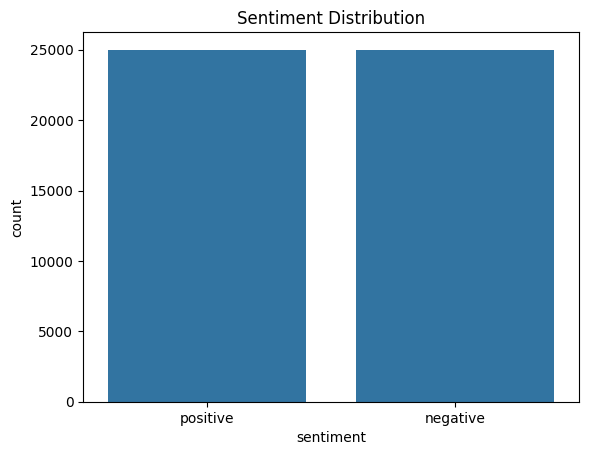

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

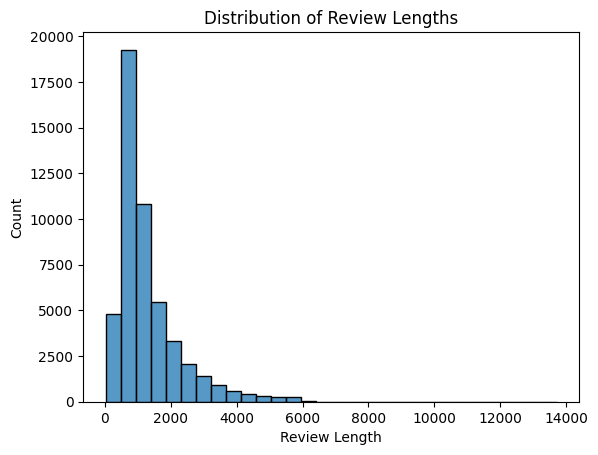

In [46]:
df['review_length'] = df['review'].apply(len)

# Distribution of review lengths
sns.histplot(df['review_length'], bins=30)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.show()

In [48]:
df1 = df.drop('review_length', axis=1)
df1.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


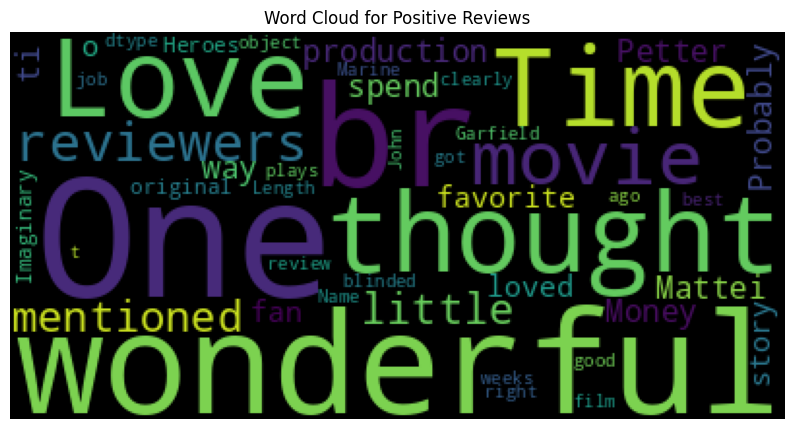

In [49]:
from wordcloud import WordCloud
text=str(df1[df1["sentiment"]=="positive"]["review"])

# Generating a word cloud
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud)
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

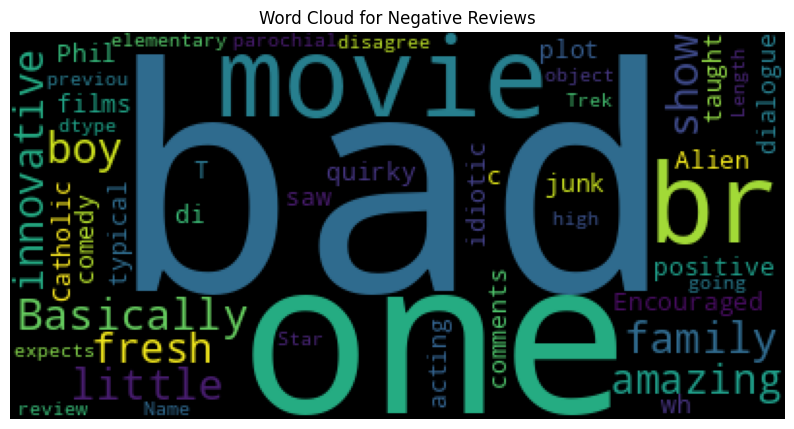

In [50]:
text=str(df1[df1["sentiment"]=="negative"]["review"])

# Generating a word cloud
wordcloud = WordCloud().generate(text)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

In [51]:
## Clean the text - remove noisy tokens like punctuations and stopword

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
remove_text = re.compile(r'<.*?>')
non_alpha_pattern = re.compile(r'[^a-z\s]')

def cleaned_text(text):
    text = text.lower()
    text = remove_text.sub(' ', text)
    text = non_alpha_pattern.sub('', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [52]:
def processing_data(df, chunk_size = 5000):
    cleaned_chunks = []
    for start in range(0, df1.shape[0], chunk_size):
        end = start + chunk_size
        chunk = df1.iloc[start:end].copy()
        chunk['Cleaned_Reviews'] = chunk['review'].apply(cleaned_text)
        cleaned_chunks.append(chunk)
    return pd.concat(cleaned_chunks, ignore_index = True)

In [53]:
nltk.download('punkt')

Cleaned_df = processing_data(df1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [55]:
Cleaned_df['tokens'] = Cleaned_df['Cleaned_Reviews'].apply(word_tokenize)

In [57]:
## 3) Train a model of your choice using a custom Skip-gram vectors

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Cleaned_df["sentiment"]=le.fit_transform(Cleaned_df["sentiment"])
Cleaned_df.head()

,review,sentiment,Cleaned_Reviews,tokens
0,One of the other reviewers has mentioned that ...,1,one reviewers mentioned watching oz episode yo...,"[one, reviewers, mentioned, watching, oz, epis..."
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn..."
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,0,basically theres family little boy jake thinks...,"[basically, theres, family, little, boy, jake,..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,..."


In [64]:
from gensim.models import Word2Vec

skipgram = Word2Vec(sentences = Cleaned_df['tokens'],
                    vector_size = 50,
                    sg = 1,
                    window = 5,
                    min_count = 1)

skipgram.save('skipgram.model')

In [68]:
import numpy as np

X = [np.mean([skipgram.wv[token] for token in tokens if token in skipgram.wv] or [np.zeros(100)], axis = 0) for tokens in Cleaned_df['tokens']]
Y = df1['sentiment'].map({'positive': 1, 'negative': 0})

from sklearn.model_selection import train_test_split
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score
model = LogisticRegression(max_iter=1000)
model.fit(X_Train, Y_Train)
# Y_Pred = model.predict(X_Test)
# Accuracy = accuracy_score(Y_Test, Y_Pred)
# F1 = f1_score(Y_Test, Y_Pred)

In [74]:
Y_Pred_Skip_gram = model.predict(X_Test)
Accuracy_SkipGram = accuracy_score(Y_Test, Y_Pred_Skip_gram)
F1_Score_SkipGram = f1_score(Y_Test, Y_Pred_Skip_gram)

print(f"Accuracy of Skip-Gram: {Accuracy_SkipGram:.3f}")
print(f"F1 Score of Skip-Gram: {F1_Score_SkipGram:.3f}")

Accuracy of Skip-Gram: 0.867
F1 Score of Skip-Gram: 0.868


In [77]:
from sklearn.metrics import classification_report
print(classification_report(Y_Test, Y_Pred_Skip_gram))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      4961
           1       0.87      0.87      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [78]:
## 4. Train a model of your choice using a custom CBoW vectors

cbow = Word2Vec(sentences = Cleaned_df['tokens'],
                vector_size = 50,
                sg = 0,
                window = 5,
                min_count = 1)

cbow.save('cbow.model')

In [85]:
X1 = [np.mean([cbow.wv[token] for token in tokens if token in cbow.wv] or [np.zeros(100)], axis = 0) for tokens in Cleaned_df['tokens']]
Y1 = df1['sentiment'].map({'positive': 1, 'negative': 0})

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)

model1 = LogisticRegression(max_iter=1000)
model1.fit(X_Train, Y_Train)

Y_Pred_CBoW = model1.predict(X_Test)
Accuracy_CBoW = accuracy_score(Y_Test, Y_Pred_CBoW)
F1_Score_CBoW = f1_score(Y_Test, Y_Pred_CBoW)

print(f"Accuracy of CBoW: {Accuracy_CBoW:.3f}")
print(f"F1 Score of CBoW: {F1_Score_CBoW:.3f}")

Accuracy of CBoW: 0.850
F1 Score of CBoW: 0.852


In [86]:
print("Classification Report of CBoW: ")
print(classification_report(Y_Test, Y_Pred_CBoW))

Classification Report of CBoW: 
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [93]:
## 5. Train a model of your choice using any pretrained word2vec model’s vectors

def word2vectors(tokens, model, vector_size = 200):
    vectors = [model[word] for word in tokens if word in model]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis = 0)

Cleaned_df['vector'] = Cleaned_df['tokens'].apply(lambda tokens: word2vectors(tokens, wv_pretrained))

In [94]:
X2 = np.array(Cleaned_df['vector'].tolist())
Y2 = df1['sentiment'].map({'positive': 1, 'negative': 0})

X_train, X_test, Y_train, Y_test = train_test_split(X2, Y2, test_size = 0.2, random_state = 42)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train, Y_train)

Y_Pred_Pretrained_W2V = model2.predict(X_test)
Accuracy_Pretrained_W2V = accuracy_score(Y_test, Y_Pred_Pretrained_W2V)
F1_Score_Pretrained_W2V = f1_score(Y_test, Y_Pred_Pretrained_W2V)

print(f"Accuracy of Pretrained Word2Vec: {Accuracy_Pretrained_W2V:.3f}")
print(f"F1 Score of Pretrained Word2Vec: {F1_Score_Pretrained_W2V:.3f}")

Accuracy of Pretrained Word2Vec: 0.852
F1 Score of Pretrained Word2Vec: 0.853


In [95]:
print("Classification Report of Pretrained Word2Vec: ")
print(classification_report(Y_test, Y_Pred_Pretrained_W2V))

Classification Report of Pretrained Word2Vec: 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      4961
           1       0.85      0.85      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [103]:
## 6. Check if you can improve the model performance for [2] Skipgram and [3] CBoW by updating the vector length, window size, min count, etc.

## Improved Skip-Gram
Improved_SkipGram = Word2Vec(Cleaned_df['tokens'],
                             vector_size = 100,
                             sg = 1,
                             window = 6,
                             min_count = 1)

Improved_SkipGram.save('Improved_SkipGram.model')

A = [np.mean([Improved_SkipGram.wv[token] for token in tokens if token in Improved_SkipGram.wv] or [np.zeros(100)], axis = 0) for tokens in Cleaned_df['tokens']]
B = df1['sentiment'].map({'positive': 1, 'negative': 0})

from sklearn.model_selection import train_test_split
X_Train, X_Test, y_train, y_test = train_test_split(A, B, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score
model3 = LogisticRegression(max_iter=1000)
model3.fit(X_Train, y_train)

Y_Pred_Improved_SkipGram = model3.predict(X_Test)
Accuracy_Improved_SkipGram = accuracy_score(y_test, Y_Pred_Improved_SkipGram)
F1_Score_Improved_SkipGram = f1_score(y_test, Y_Pred_Improved_SkipGram)

print(f"Accuracy of Skip-Gram: {Accuracy_Improved_SkipGram:.3f}")
print(f"F1 Score of Skip-Gram: {F1_Score_Improved_SkipGram:.3f}")

Accuracy of Skip-Gram: 0.878
F1 Score of Skip-Gram: 0.880


In [104]:
print("Classification Report of Improved Skip-Gram: ")
print(classification_report(y_test, Y_Pred_Improved_SkipGram))

Classification Report of Improved Skip-Gram: 
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [105]:
## Improved CBoW

Improved_CBoW = Word2Vec(Cleaned_df['tokens'],
                             vector_size = 100,
                             sg = 1,
                             window = 7,
                             min_count = 1)

Improved_CBoW.save('Improved_CBoW.model')

A1 = [np.mean([Improved_CBoW.wv[token] for token in tokens if token in Improved_CBoW.wv] or [np.zeros(200)], axis = 0) for tokens in Cleaned_df['tokens']]
B1 = df['sentiment'].map({'positive': 1, 'negative': 0})

from sklearn.model_selection import train_test_split
x_train, x_test, Y_Train, Y_Test = train_test_split(A1, B1, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , f1_score
model4 = LogisticRegression(max_iter=1000)
model4.fit(x_train, Y_Train)

Y_Pred_Improved_CBoW = model4.predict(x_test)
Accuracy_Improved_CBoW = accuracy_score(Y_Test, Y_Pred_Improved_CBoW)
F1_Score_Improved_CBoW = f1_score(Y_Test, Y_Pred_Improved_CBoW)

print(f"Accuracy of Improved CBoW: {Accuracy_Improved_CBoW:.3f}")
print(f"F1 Score of Improved CBoW: {F1_Score_Improved_CBoW:.3f}")

Accuracy of Improved CBoW: 0.881
F1 Score of Improved CBoW: 0.882


In [106]:
print("Classification Report of Improved CBoW: ")
print(classification_report(Y_Test, Y_Pred_Improved_CBoW))

Classification Report of Improved CBoW: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      4961
           1       0.88      0.88      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [ ]:
## All Metrics of All Models
## SkipGram
# Accuracy of Skip-Gram: 0.867
# F1 Score of Skip-Gram: 0.868

In [ ]:
## CBoW
# Accuracy of CBoW: 0.850
# F1 Score of CBoW: 0.852

In [ ]:
## Pretrained Word2Vec
# Accuracy of Pretrained Word2Vec: 0.852
# F1 Score of Pretrained Word2Vec: 0.853

In [ ]:
## Improved Skip-Gram
# Accuracy of Improved Skip-Gram: 0.878
# F1 Score of Improved Skip-Gram: 0.880

In [ ]:
## Improved CBow
# Accuracy of Improved CBoW: 0.881
# F1 Score of Improved CBoW: 0.882